## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, pointbiserialr, pearsonr
import itertools
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score,StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score,log_loss
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler
import xgboost as xgb
from datetime import datetime
import os
import tensorflow as tf
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight

## LINK TO DATASET AND COMPETITION

https://www.kaggle.com/competitions/playground-series-s3e26/overview

## 2. Data import and EDA

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [3]:
train_df.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   
3   3    2576          Placebo  18460   F       N            N       N     N   
4   4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin  Stage Status  
0      394.0          9.7    3.0      D  
1      361.0         11.0    3.0      C  
2      199.0         11.7    4.0      D  
3      269.0         10.7    3.0      C  
4      298.0         10.6    4.0      C

In [4]:
train_df.describe()

id       N_Days           Age    Bilirubin  Cholesterol  \
count  7905.000000  7905.000000   7905.000000  7905.000000  7905.000000   
mean   3952.000000  2030.173308  18373.146490     2.594485   350.561923   
std    2282.121272  1094.233744   3679.958739     3.812960   195.379344   
min       0.000000    41.000000   9598.000000     0.300000   120.000000   
25%    1976.000000  1230.000000  15574.000000     0.700000   248.000000   
50%    3952.000000  1831.000000  18713.000000     1.100000   298.000000   
75%    5928.000000  2689.000000  20684.000000     3.000000   390.000000   
max    7904.000000  4795.000000  28650.000000    28.000000  1775.000000   

           Albumin       Copper      Alk_Phos         SGOT  Tryglicerides  \
count  7905.000000  7905.000000   7905.000000  7905.000000    7905.000000   
mean      3.548323    83.902846   1816.745250   114.604602     115.340164   
std       0.346171    75.899266   1903.750657    48.790945      52.530402   
min       1.960000     4.000000    289.000000    26.350000      33.000000   
25%       3.350000    39.000000    834.000000    75.950000      84.000000   
50%       3.580000    63.000000   1181.000000   108.500000     104.000000   
75%       3.770000   102.000000   1857.000000   137.950000     139.000000   
max       4.640000   588.000000  13862.400000   457.250000     598.000000   

         Platelets  Prothrombin        Stage  
count  7905.000000  7905.000000  7905.000000  
mean    265.228969    10.629462     3.032511  
std      87.465579     0.781735     0.866511  
min      62.000000     9.000000     1.000000  
25%     211.000000    10.000000     2.000000  
50%     265.000000    10.600000     3.000000  
75%     316.000000    11.000000     4.000000  
max     563.000000    18.000000     4.000000

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

In [7]:
len(train_df['id'].unique()) #each row has only 1 ID

7905

In [8]:
train_df['Status'].value_counts()

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

In [9]:
(train_df['Status'].value_counts()/len(train_df))*100

Status
C     62.808349
D     33.712840
CL     3.478811
Name: count, dtype: float64

In [19]:
test_df.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [10]:
def count_outliers_iqr(df):
    """
    Calculates the number of outliers for columns
    """
    outlier_counts = {}
    for column in df.select_dtypes(include=['float64', 'int64']):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = (len(outliers)/df.shape[0])*100
    return outlier_counts

count_outliers_iqr(train_df)

{'id': 0.0,
 'N_Days': 0.0,
 'Age': 0.45540796963946867,
 'Bilirubin': 9.981024667931688,
 'Cholesterol': 6.350411132194814,
 'Albumin': 2.2517394054395954,
 'Copper': 8.285895003162555,
 'Alk_Phos': 10.018975332068312,
 'SGOT': 1.8469323213156232,
 'Tryglicerides': 3.3776091081593926,
 'Platelets': 1.4421252371916509,
 'Prothrombin': 2.1884882985452245,
 'Stage': 0.0}

In [13]:
def encoder(df, target_column):
    """
    Performs encoding of the dataframe by:
    1. detecting categorical and numeric variables
    2. Does OneHotEncoding of categorical variables
    3. Does MinMaxScaling of numerical variables
    4. Does LabelEncoding of target column, if the target column exists. Prints error if it doesn't exist
    
    Parameters:
        df (pd.DataFrame): Input dataframe.
        target_column (str): Name of the target column.
    Returns:
        pd.DataFrame: Transformed dataframe with encoded and scaled features.
        list: list of numerical and categorical columns for using in later fucntions
   
    """
    if target_column not in df.columns:
        print(f"Error: Target column '{target_column}' not found in the dataframe.")
    else:
        # LabelEncode the target column
        label_encoder = LabelEncoder()
        target_encoded = label_encoder.fit_transform(df[target_column])
        target_encoded=pd.Series(target_encoded,name='target',index=df.index)
        print(f"Target column '{target_column}' encoded with labels: {label_encoder.classes_}")

    # Separate columns by datatype
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = df.select_dtypes(include=[np.number,'int64','int32','float64','float32']).columns.tolist()

    if target_column in categorical_cols:
        categorical_cols.remove(target_column)
    if target_column in numerical_cols:
        numerical_cols.remove(target_column)

   # Preprocessing transformations
    print("\n--- Preprocessing ---")
    # OneHotEncode categorical columns
    ohe = OneHotEncoder(sparse_output=False, drop='first')
    if categorical_cols:
        categorical_transformed = ohe.fit_transform(df[categorical_cols])
        categorical_transformed = pd.DataFrame(categorical_transformed, 
                                               columns=ohe.get_feature_names_out(categorical_cols),
                                               index=df.index)
        print(f"Categorical columns encoded: {categorical_cols}")
    else:
        categorical_transformed = pd.DataFrame(index=df.index)

    # Standardize numerical columns
    scaler = MinMaxScaler()
    if numerical_cols:
        numerical_transformed = scaler.fit_transform(df[numerical_cols])
        numerical_transformed = pd.DataFrame(numerical_transformed, 
                                             columns=numerical_cols, 
                                             index=df.index)
        print(f"Numerical columns scaled: {numerical_cols}")
    else:
        numerical_transformed = pd.DataFrame(index=df.index)

    # Combine transformed data
    if target_column not in df.columns:
        transformed_df = pd.concat([categorical_transformed, numerical_transformed],axis=1)
    else:
        transformed_df = pd.concat([categorical_transformed, numerical_transformed,target_encoded], axis=1)

    return transformed_df,categorical_cols,numerical_cols

train_encoded,categorical_cols,numerical_cols=encoder(train_df.drop('id',axis=1),'Status')
train_encoded.head()





Target column 'Status' encoded with labels: ['C' 'CL' 'D']

--- Preprocessing ---
Categorical columns encoded: ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
Numerical columns scaled: ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


Drug_Placebo  Sex_M  Ascites_Y  Hepatomegaly_Y  Spiders_Y  Edema_S  \
0           0.0    1.0        0.0             0.0        0.0      0.0   
1           1.0    0.0        0.0             0.0        0.0      0.0   
2           1.0    0.0        0.0             1.0        1.0      0.0   
3           1.0    0.0        0.0             0.0        0.0      0.0   
4           1.0    0.0        0.0             1.0        0.0      0.0   

   Edema_Y    N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
0      0.0  0.201515  0.626391   0.072202     0.118429  0.518657  0.287671   
1      0.0  0.532814  0.505931   0.021661     0.147432  0.589552  0.101027   
2      1.0  0.712453  0.216723   0.108303     0.108157  0.593284  0.217466   
3      0.0  0.533235  0.465148   0.010830     0.082175  0.574627  0.092466   
4      0.0  0.157131  0.370565   0.028881     0.136556  0.630597  0.101027   

   Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin     Stage  target  
0  0.096660  0.356115       0.053097   0.662675     0.077778  0.666667       2  
1  0.084798  0.251799       0.097345   0.596806     0.222222  0.666667       0  
2  0.054518  0.215827       0.030088   0.273453     0.300000  1.000000       2  
3  0.100491  0.104317       0.111504   0.413174     0.188889  0.666667       0  
4  0.065717  0.230216       0.111504   0.471058     0.177778  1.000000       0

In [21]:
test_encoded,categorical_cols,numerical_cols=encoder(test_df.drop('id',axis=1),'Status')
test_encoded.head()

Error: Target column 'Status' not found in the dataframe.

--- Preprocessing ---
Categorical columns encoded: ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
Numerical columns scaled: ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


Drug_Placebo  Sex_M  Ascites_Y  Hepatomegaly_Y  Spiders_Y  Edema_S  \
0           0.0    0.0        0.0             1.0        0.0      0.0   
1           0.0    0.0        0.0             0.0        0.0      0.0   
2           1.0    0.0        0.0             1.0        0.0      0.0   
3           0.0    0.0        0.0             0.0        0.0      0.0   
4           0.0    0.0        0.0             1.0        0.0      0.0   

   Edema_Y    N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
0      0.0  0.798906  0.531493   0.032491     0.257402  0.526119  0.104452   
1      0.0  0.510517  0.282228   0.028881     0.326284  0.843284  0.154110   
2      1.0  0.002103  0.186385   0.061372     0.018731  0.373134  0.071918   
3      0.0  0.481489  0.572748   0.010830     0.104532  0.705224  0.061644   
4      0.0  0.331090  0.645916   0.039711     0.094864  0.376866  0.200342   

   Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin     Stage  
0  0.099238  0.291367       0.100885   0.734531     0.258065  0.333333  
1  0.071316  0.291367       0.215929   0.329341     0.161290  0.333333  
2  0.049509  0.100719       0.120354   0.301397     0.645161  1.000000  
3  0.019523  0.230216       0.040708   0.415170     0.258065  0.333333  
4  0.060486  0.228939       0.164602   0.317365     0.129032  0.000000

In [22]:

print(categorical_cols)

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


In [24]:
test_encoded.head()

Drug_Placebo  Sex_M  Ascites_Y  Hepatomegaly_Y  Spiders_Y  Edema_S  \
0           0.0    0.0        0.0             1.0        0.0      0.0   
1           0.0    0.0        0.0             0.0        0.0      0.0   
2           1.0    0.0        0.0             1.0        0.0      0.0   
3           0.0    0.0        0.0             0.0        0.0      0.0   
4           0.0    0.0        0.0             1.0        0.0      0.0   

   Edema_Y    N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
0      0.0  0.798906  0.531493   0.032491     0.257402  0.526119  0.104452   
1      0.0  0.510517  0.282228   0.028881     0.326284  0.843284  0.154110   
2      1.0  0.002103  0.186385   0.061372     0.018731  0.373134  0.071918   
3      0.0  0.481489  0.572748   0.010830     0.104532  0.705224  0.061644   
4      0.0  0.331090  0.645916   0.039711     0.094864  0.376866  0.200342   

   Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin     Stage  
0  0.099238  0.291367       0.100885   0.734531     0.258065  0.333333  
1  0.071316  0.291367       0.215929   0.329341     0.161290  0.333333  
2  0.049509  0.100719       0.120354   0.301397     0.645161  1.000000  
3  0.019523  0.230216       0.040708   0.415170     0.258065  0.333333  
4  0.060486  0.228939       0.164602   0.317365     0.129032  0.000000

In [25]:
def eda_dataframe(df, target_column):
    """
    Perform exploratory data analysis on a dataframe by:
    1. Calculating the correlation of the target column with all other columns.
    2. Calculating the correlation of all columns with each other, excluding the target column.
    3. Plotting boxplots for all numerical columns.
    4. Plotting countplot for all variables against the target column.
    5. Plotting pairplot and correlation heatmap for all columns.
    6. Saves all plots to a local directory with a datetime stamped subfolder.

    Parameters:
        df (pd.DataFrame): Input dataframe.
        target_column (str): Name of the target column.

    """
    if target_column not in df.columns:
        print(f"Error: Target column '{target_column}' not found in the dataframe.")
        return

    # Create a directory to save plots
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    output_dir = f"EDA_Plots_{timestamp}"
    os.makedirs(output_dir, exist_ok=True)

    # Identify numerical and categorical columns
    categorical_cols = [col for col in df.columns if df[col].nunique() <= 2 and col != target_column]
    numerical_cols = [col for col in df.columns if df[col].nunique() > 2 and col != target_column]

    # Calculate correlations
    print("\n--- Correlation with Target Column ---")
    if target_column in numerical_cols:
        target_corr = df.corr()[target_column].sort_values(ascending=False)
        print(target_corr)
    else:
        print(f"Correlation with non-numeric target column '{target_column}' cannot be computed directly.")

    print("\n--- Correlation Between All Columns (Excluding Target) ---")
    if numerical_cols:
        df_corr = df[numerical_cols].corr()
        print(df_corr)

    # Plot boxplots for numerical columns
    print("\n--- Boxplots for Numerical Columns ---")
    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=col)
        plt.title(f"Boxplot of {col}")
        plot_path = os.path.join(output_dir, f"boxplot_{col}.png")
        plt.savefig(plot_path)
        plt.show()

    # Plot countplots for categorical variables against the target column
    print("\n--- Countplots for Categorial Columns Against Target Column ---")
    for col in categorical_cols+[target_column]:
        if col != target_column:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=col, hue=target_column)
            plt.title(f"Countplot of {col} vs {target_column}")
            plt.xticks(rotation=45)
            plot_path = os.path.join(output_dir, f"countplot_{col}_vs_{target_column}.png")
            plt.savefig(plot_path)
            plt.show()
    # Plot barplots for categorical variables against the target column
    print("\n--- BarPlots for Target Columns Against Target Column ---")
    for col in numerical_cols+[target_column]:
        if col != target_column:
            plt.figure(figsize=(10, 6))
            sns.barplot(data=df, x=col,hue=target_column)
            plt.title(f"Barplot of {col} vs {target_column}")
            plt.xticks(rotation=45)
            plot_path = os.path.join(output_dir, f"countplot_{col}_vs_{target_column}.png")
            plt.savefig(plot_path)
            plt.show()
            

    # Pairplot
    print("\n--- Pairplot of All Columns ---")
    pairplot_path = os.path.join(output_dir, "pairplot.png")
    sns.pairplot(df, hue=target_column, corner=True, diag_kind='kde')
    plt.savefig(pairplot_path)
    plt.show()

    # Correlation heatmap
    print("\n--- Correlation Heatmap ---")
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Correlation Heatmap")
    heatmap_path = os.path.join(output_dir, "correlation_heatmap.png")
    plt.savefig(heatmap_path)
    plt.show()

    print(f"All plots have been saved to the directory: {output_dir}")


--- Correlation with Target Column ---
Correlation with non-numeric target column 'target' cannot be computed directly.

--- Correlation Between All Columns (Excluding Target) ---
                 N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
N_Days         1.000000 -0.102354  -0.346434    -0.145811  0.255724 -0.284355   
Age           -0.102354  1.000000   0.099016    -0.053876 -0.114848  0.095199   
Bilirubin     -0.346434  0.099016   1.000000     0.302153 -0.303191  0.442223   
Cholesterol   -0.145811 -0.053876   0.302153     1.000000 -0.091830  0.168266   
Albumin        0.255724 -0.114848  -0.303191    -0.091830  1.000000 -0.218479   
Copper        -0.284355  0.095199   0.442223     0.168266 -0.218479  1.000000   
Alk_Phos      -0.030874  0.025879   0.131317     0.129131 -0.083582  0.124058   
SGOT          -0.240918 -0.020768   0.368653     0.326864 -0.200928  0.323226   
Tryglicerides -0.186453  0.021767   0.315681     0.274044 -0.112304  0.290435   
Platelets

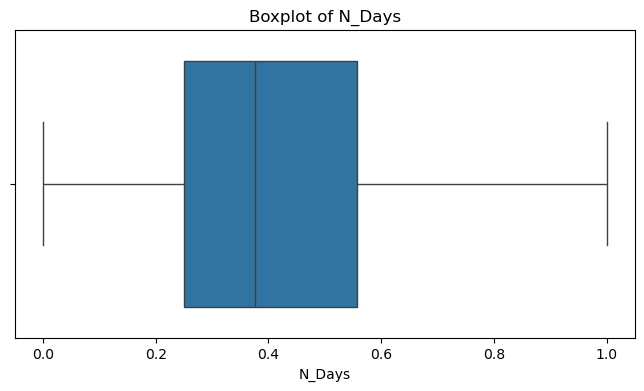

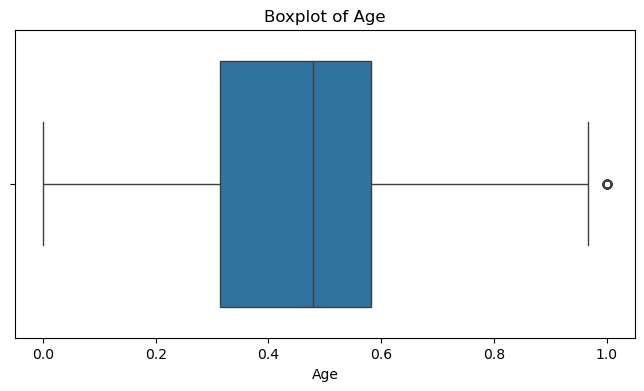

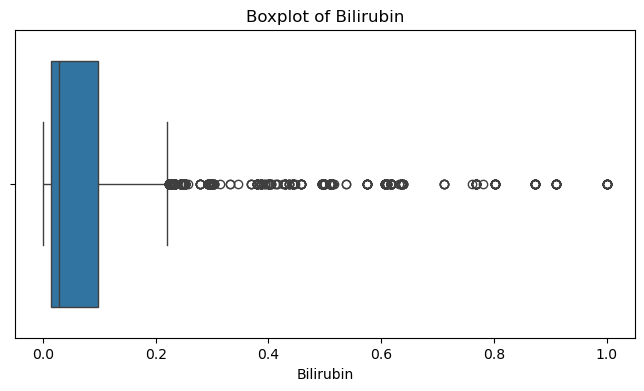

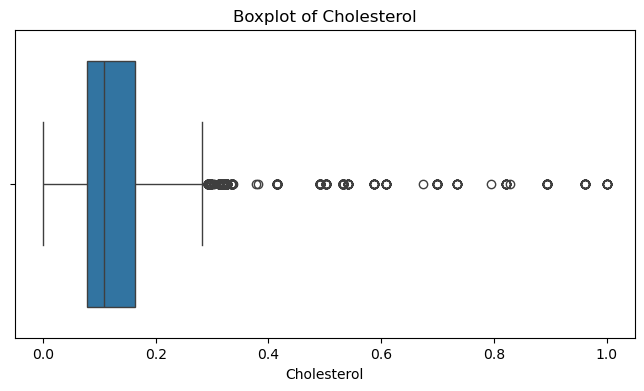

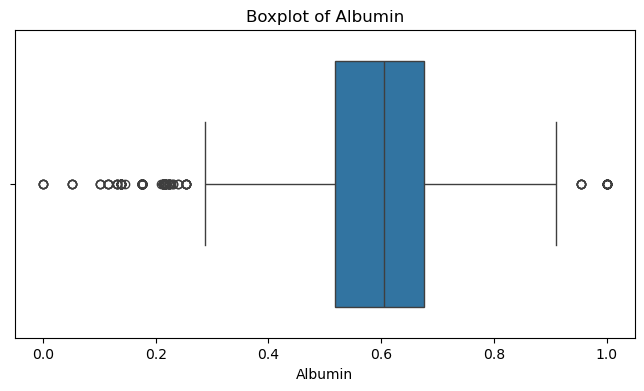

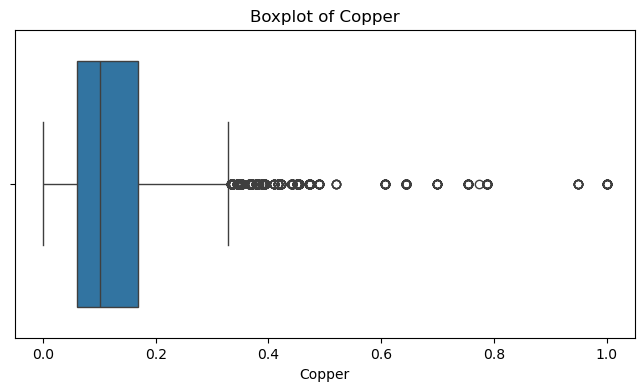

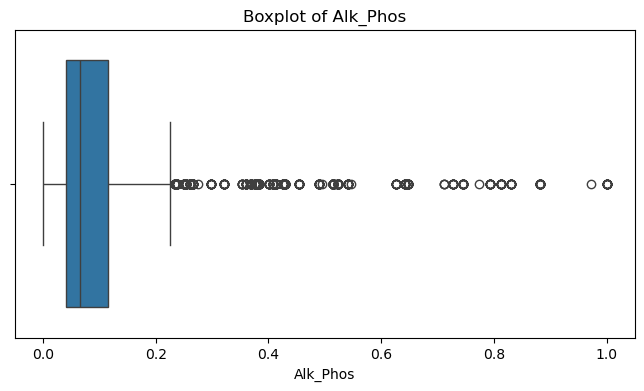

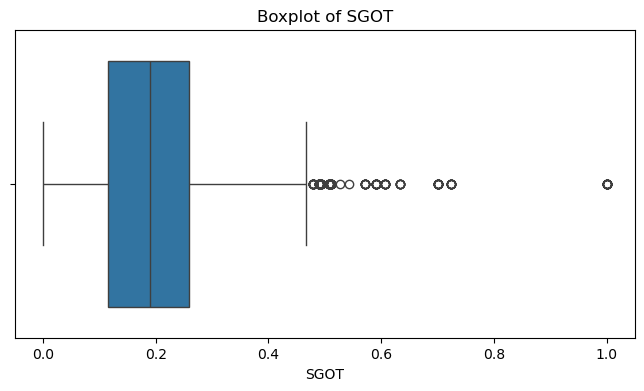

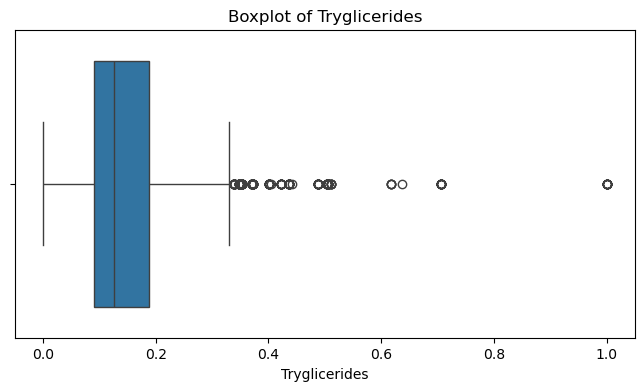

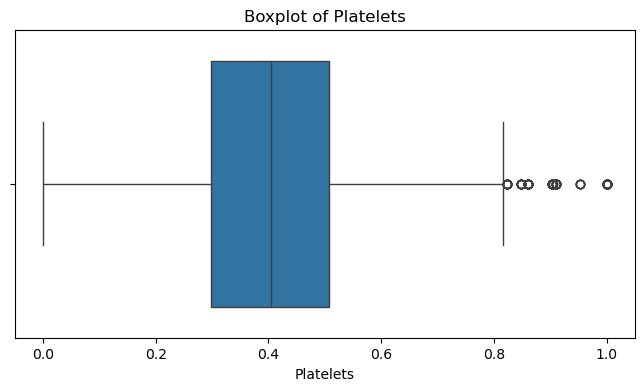

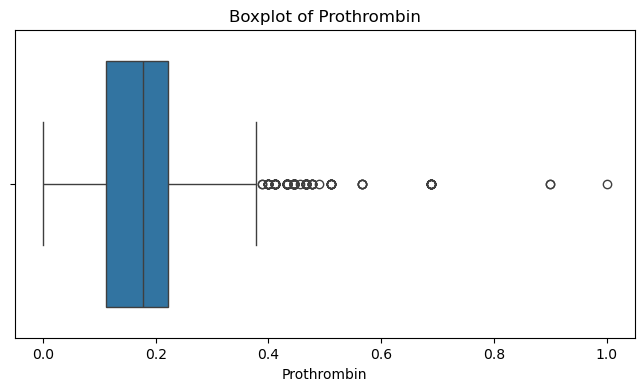

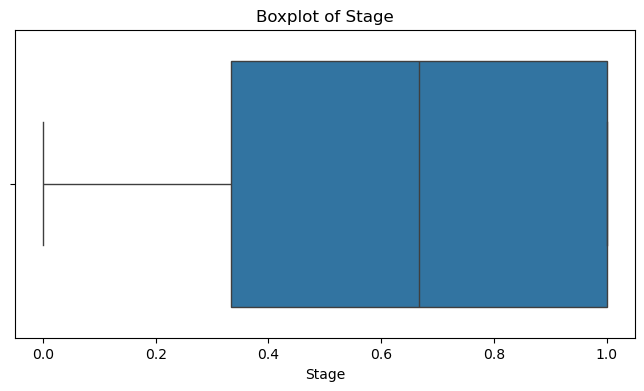


--- Countplots for Categorial Columns Against Target Column ---


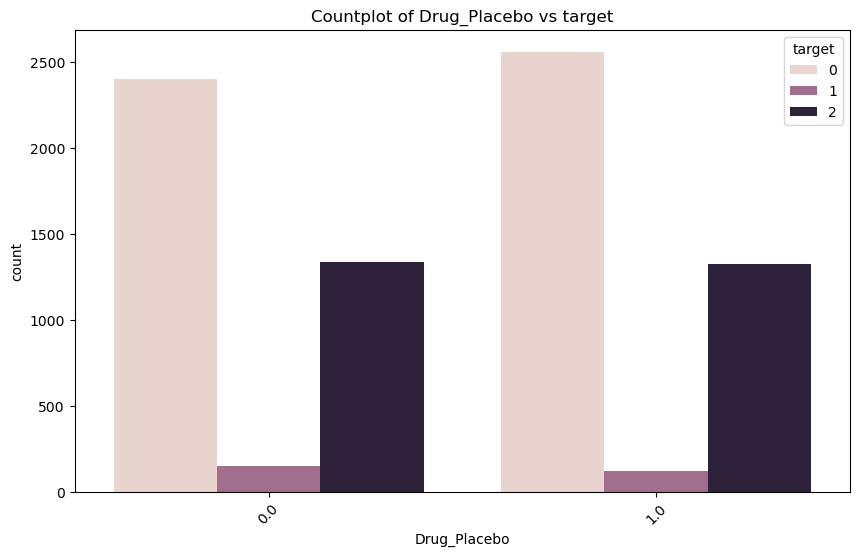

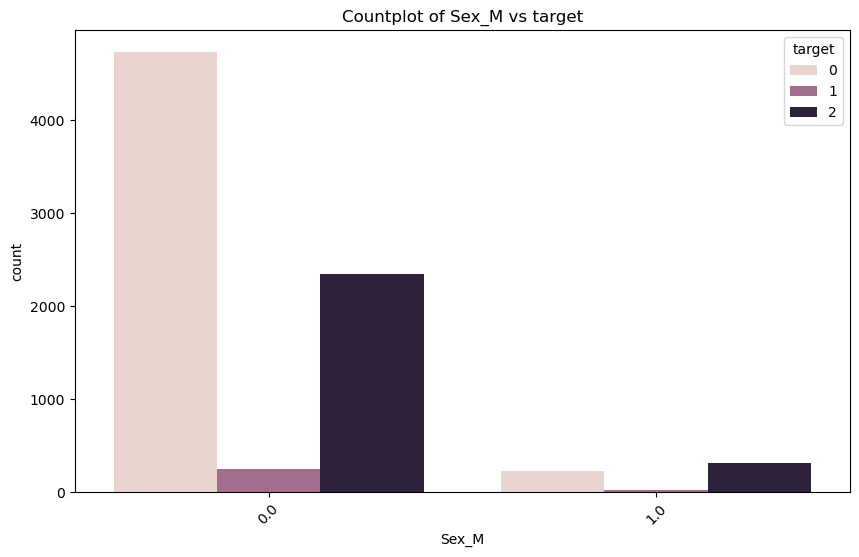

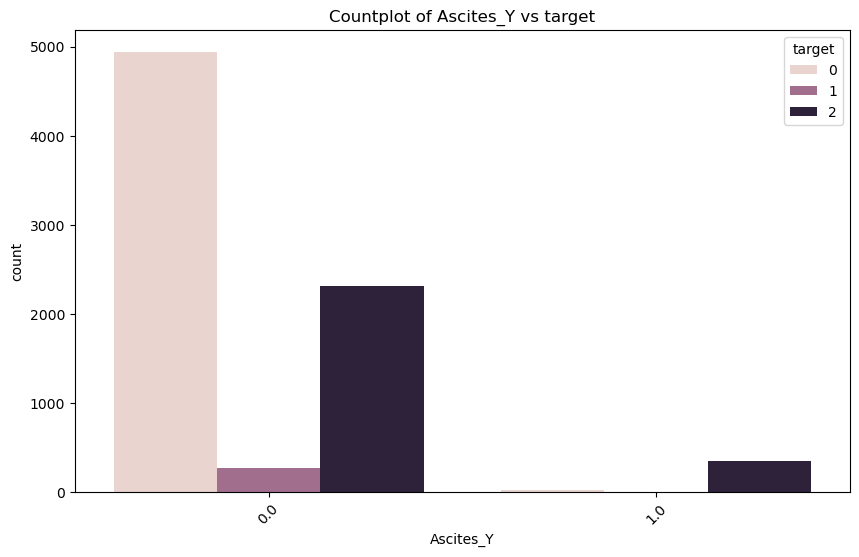

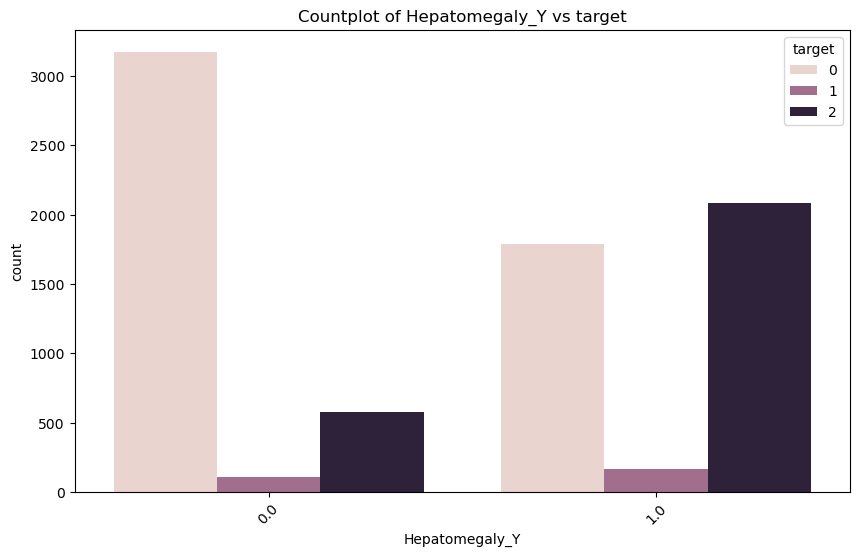

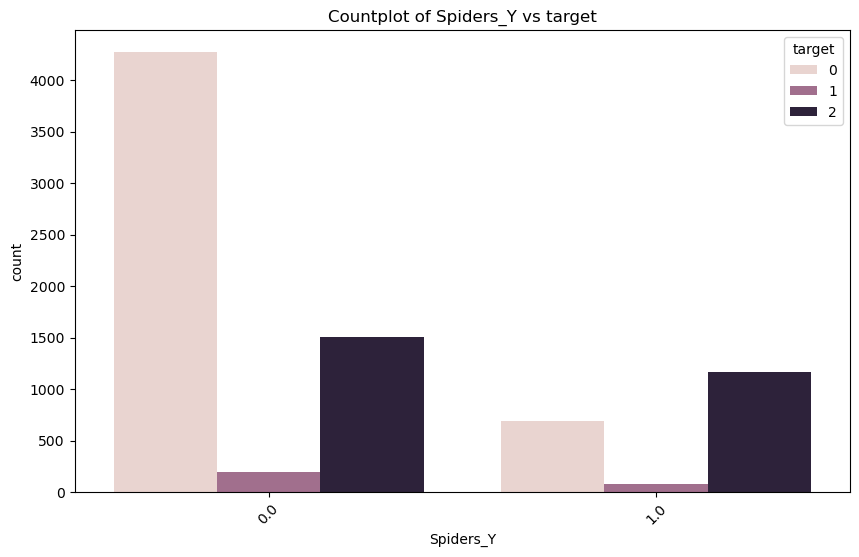

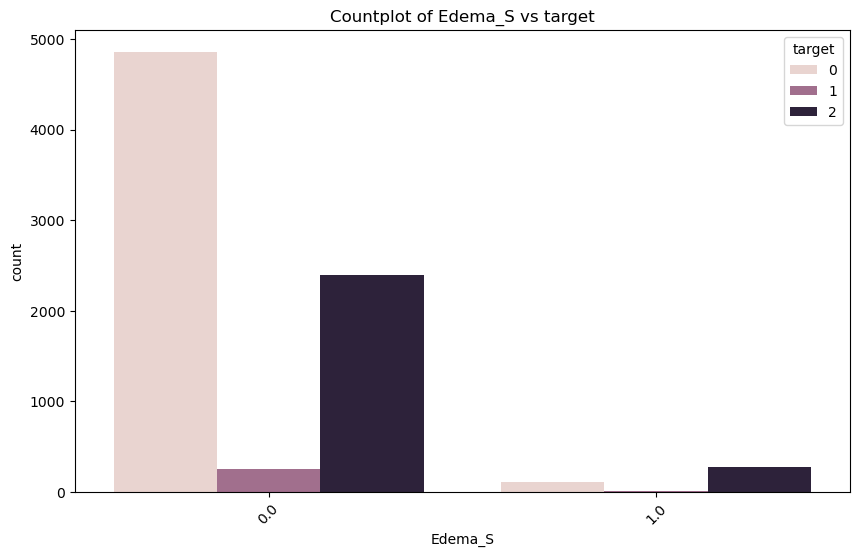

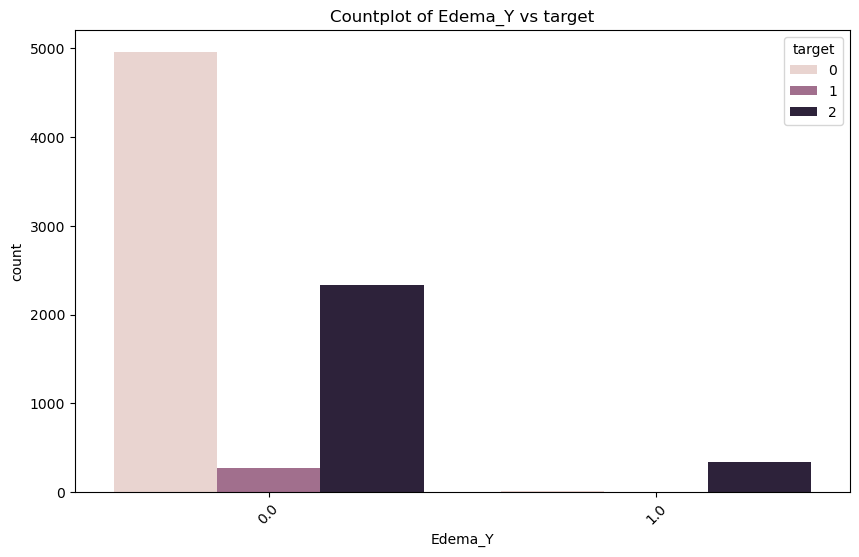


--- BarPlots for Target Columns Against Target Column ---


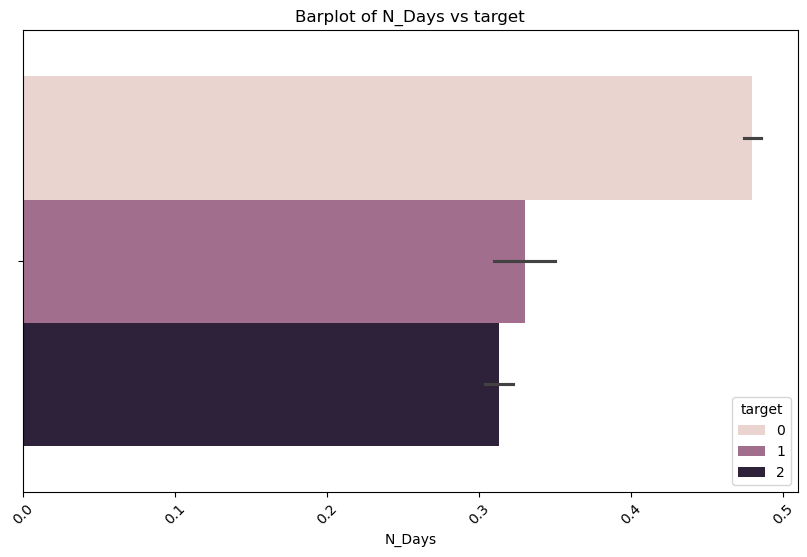

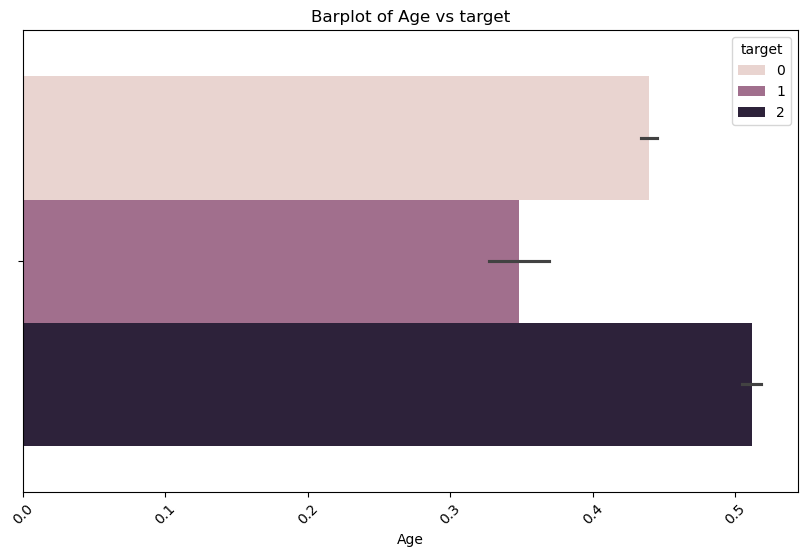

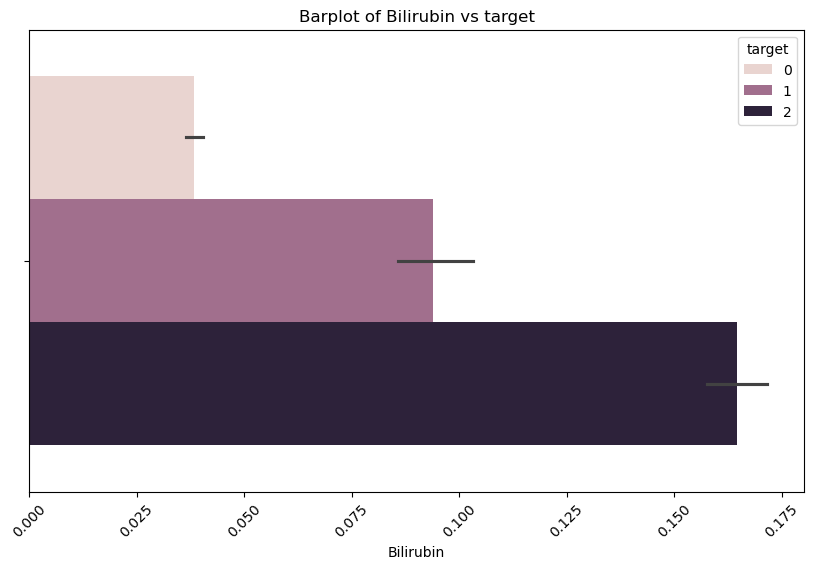

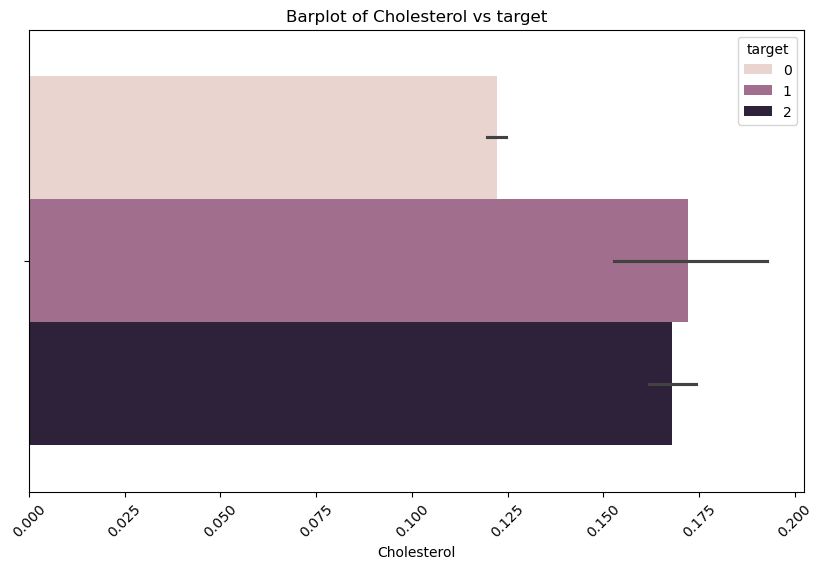

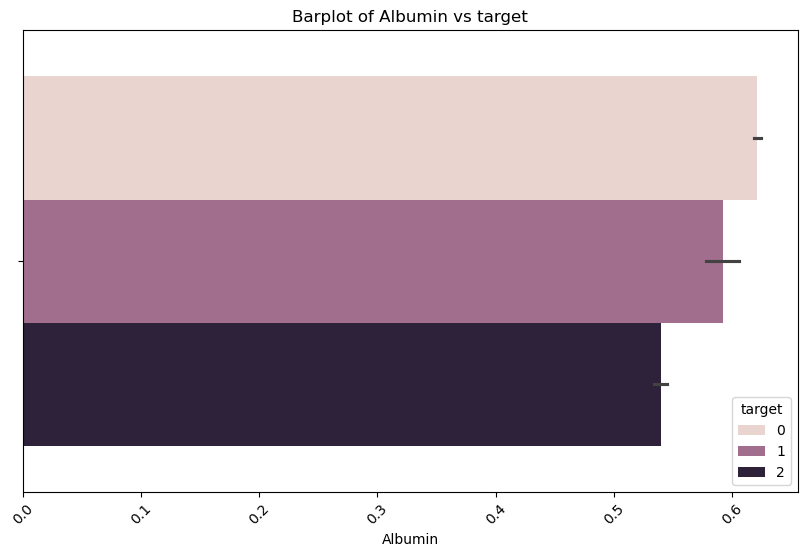

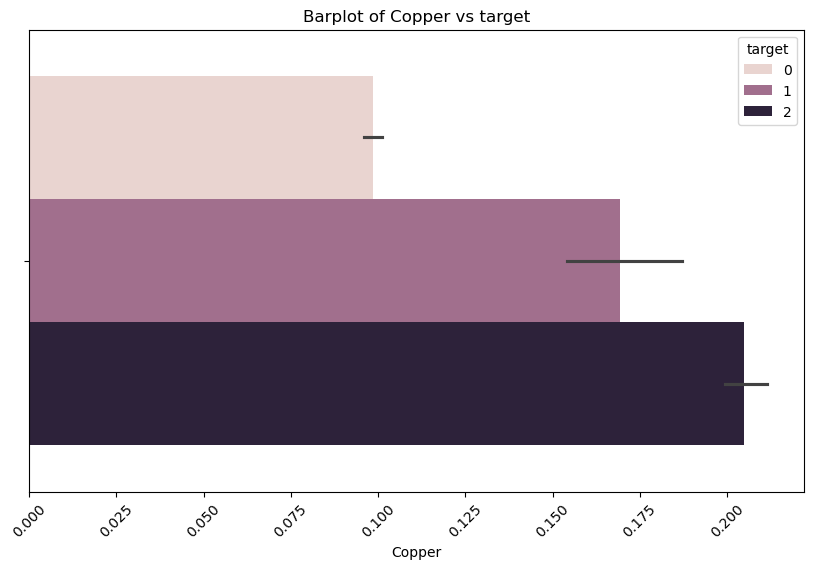

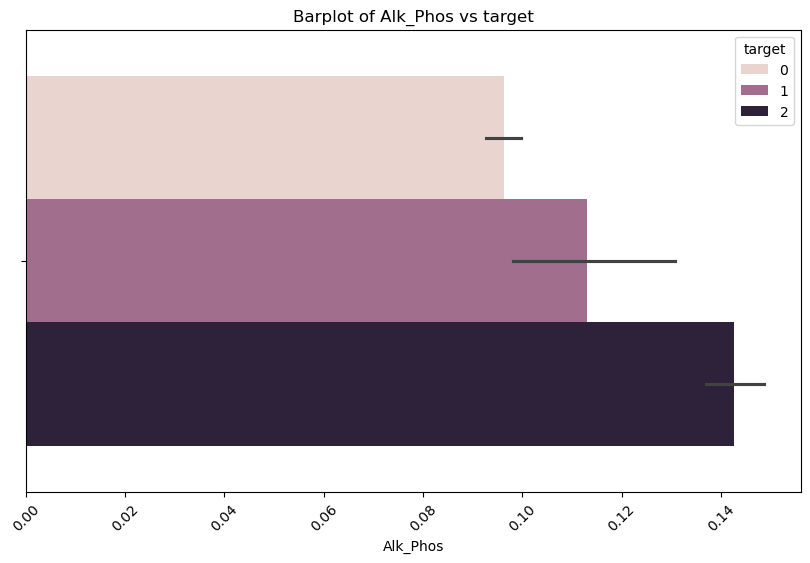

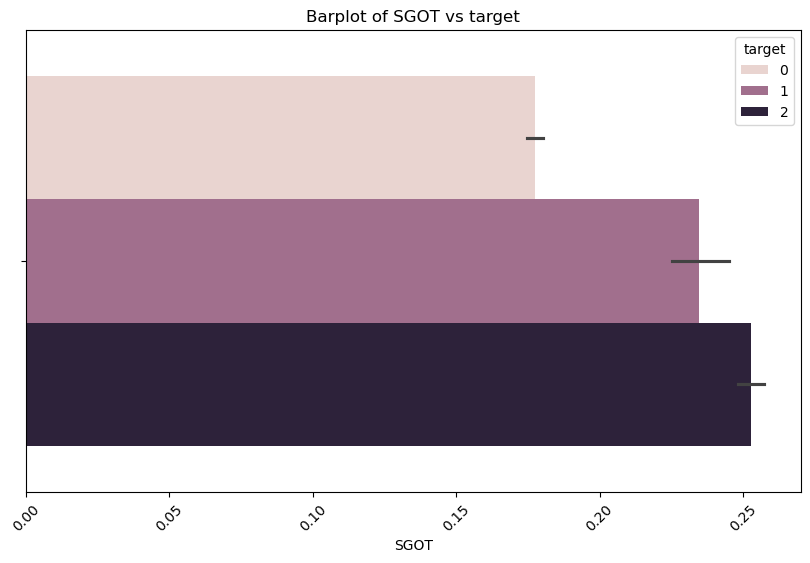

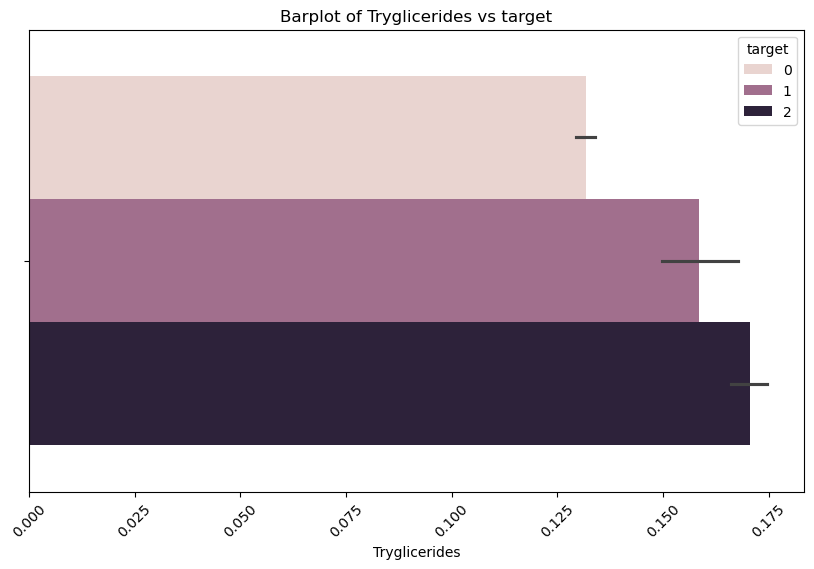

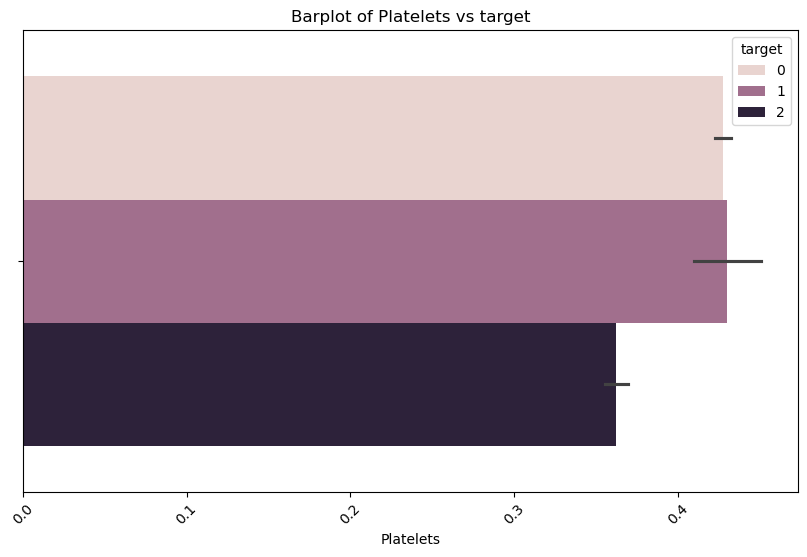

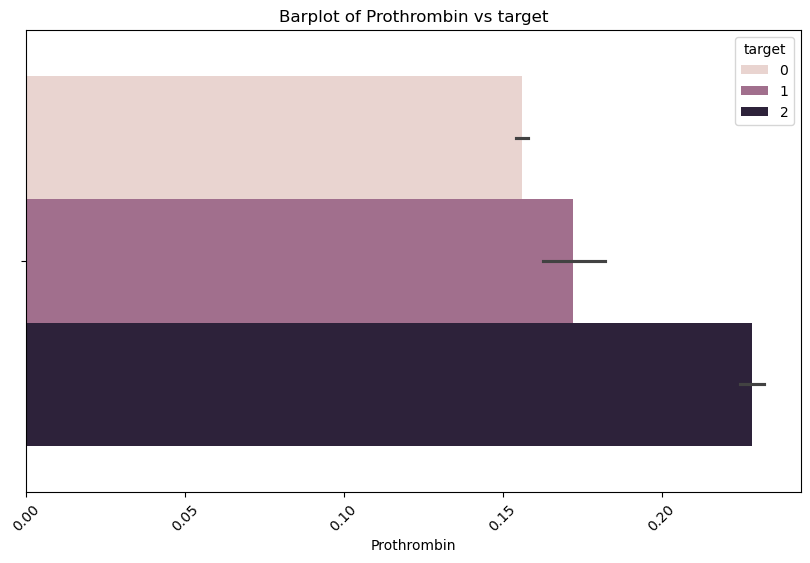

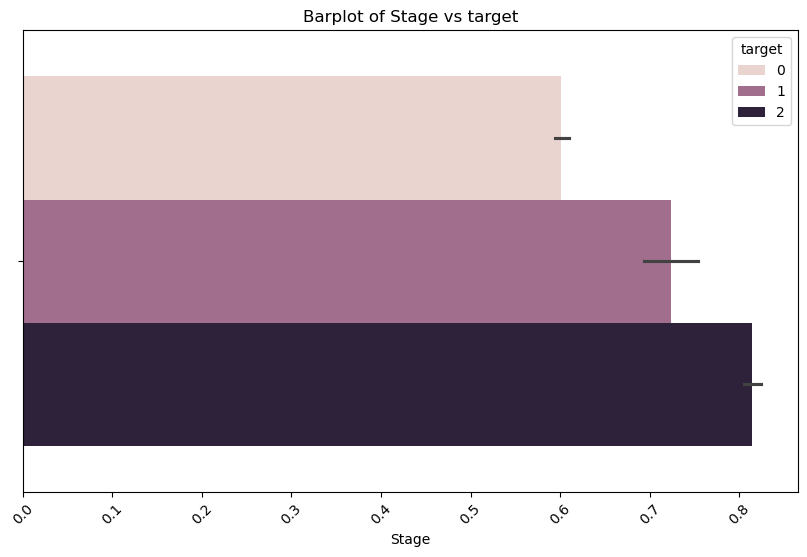


--- Pairplot of All Columns ---


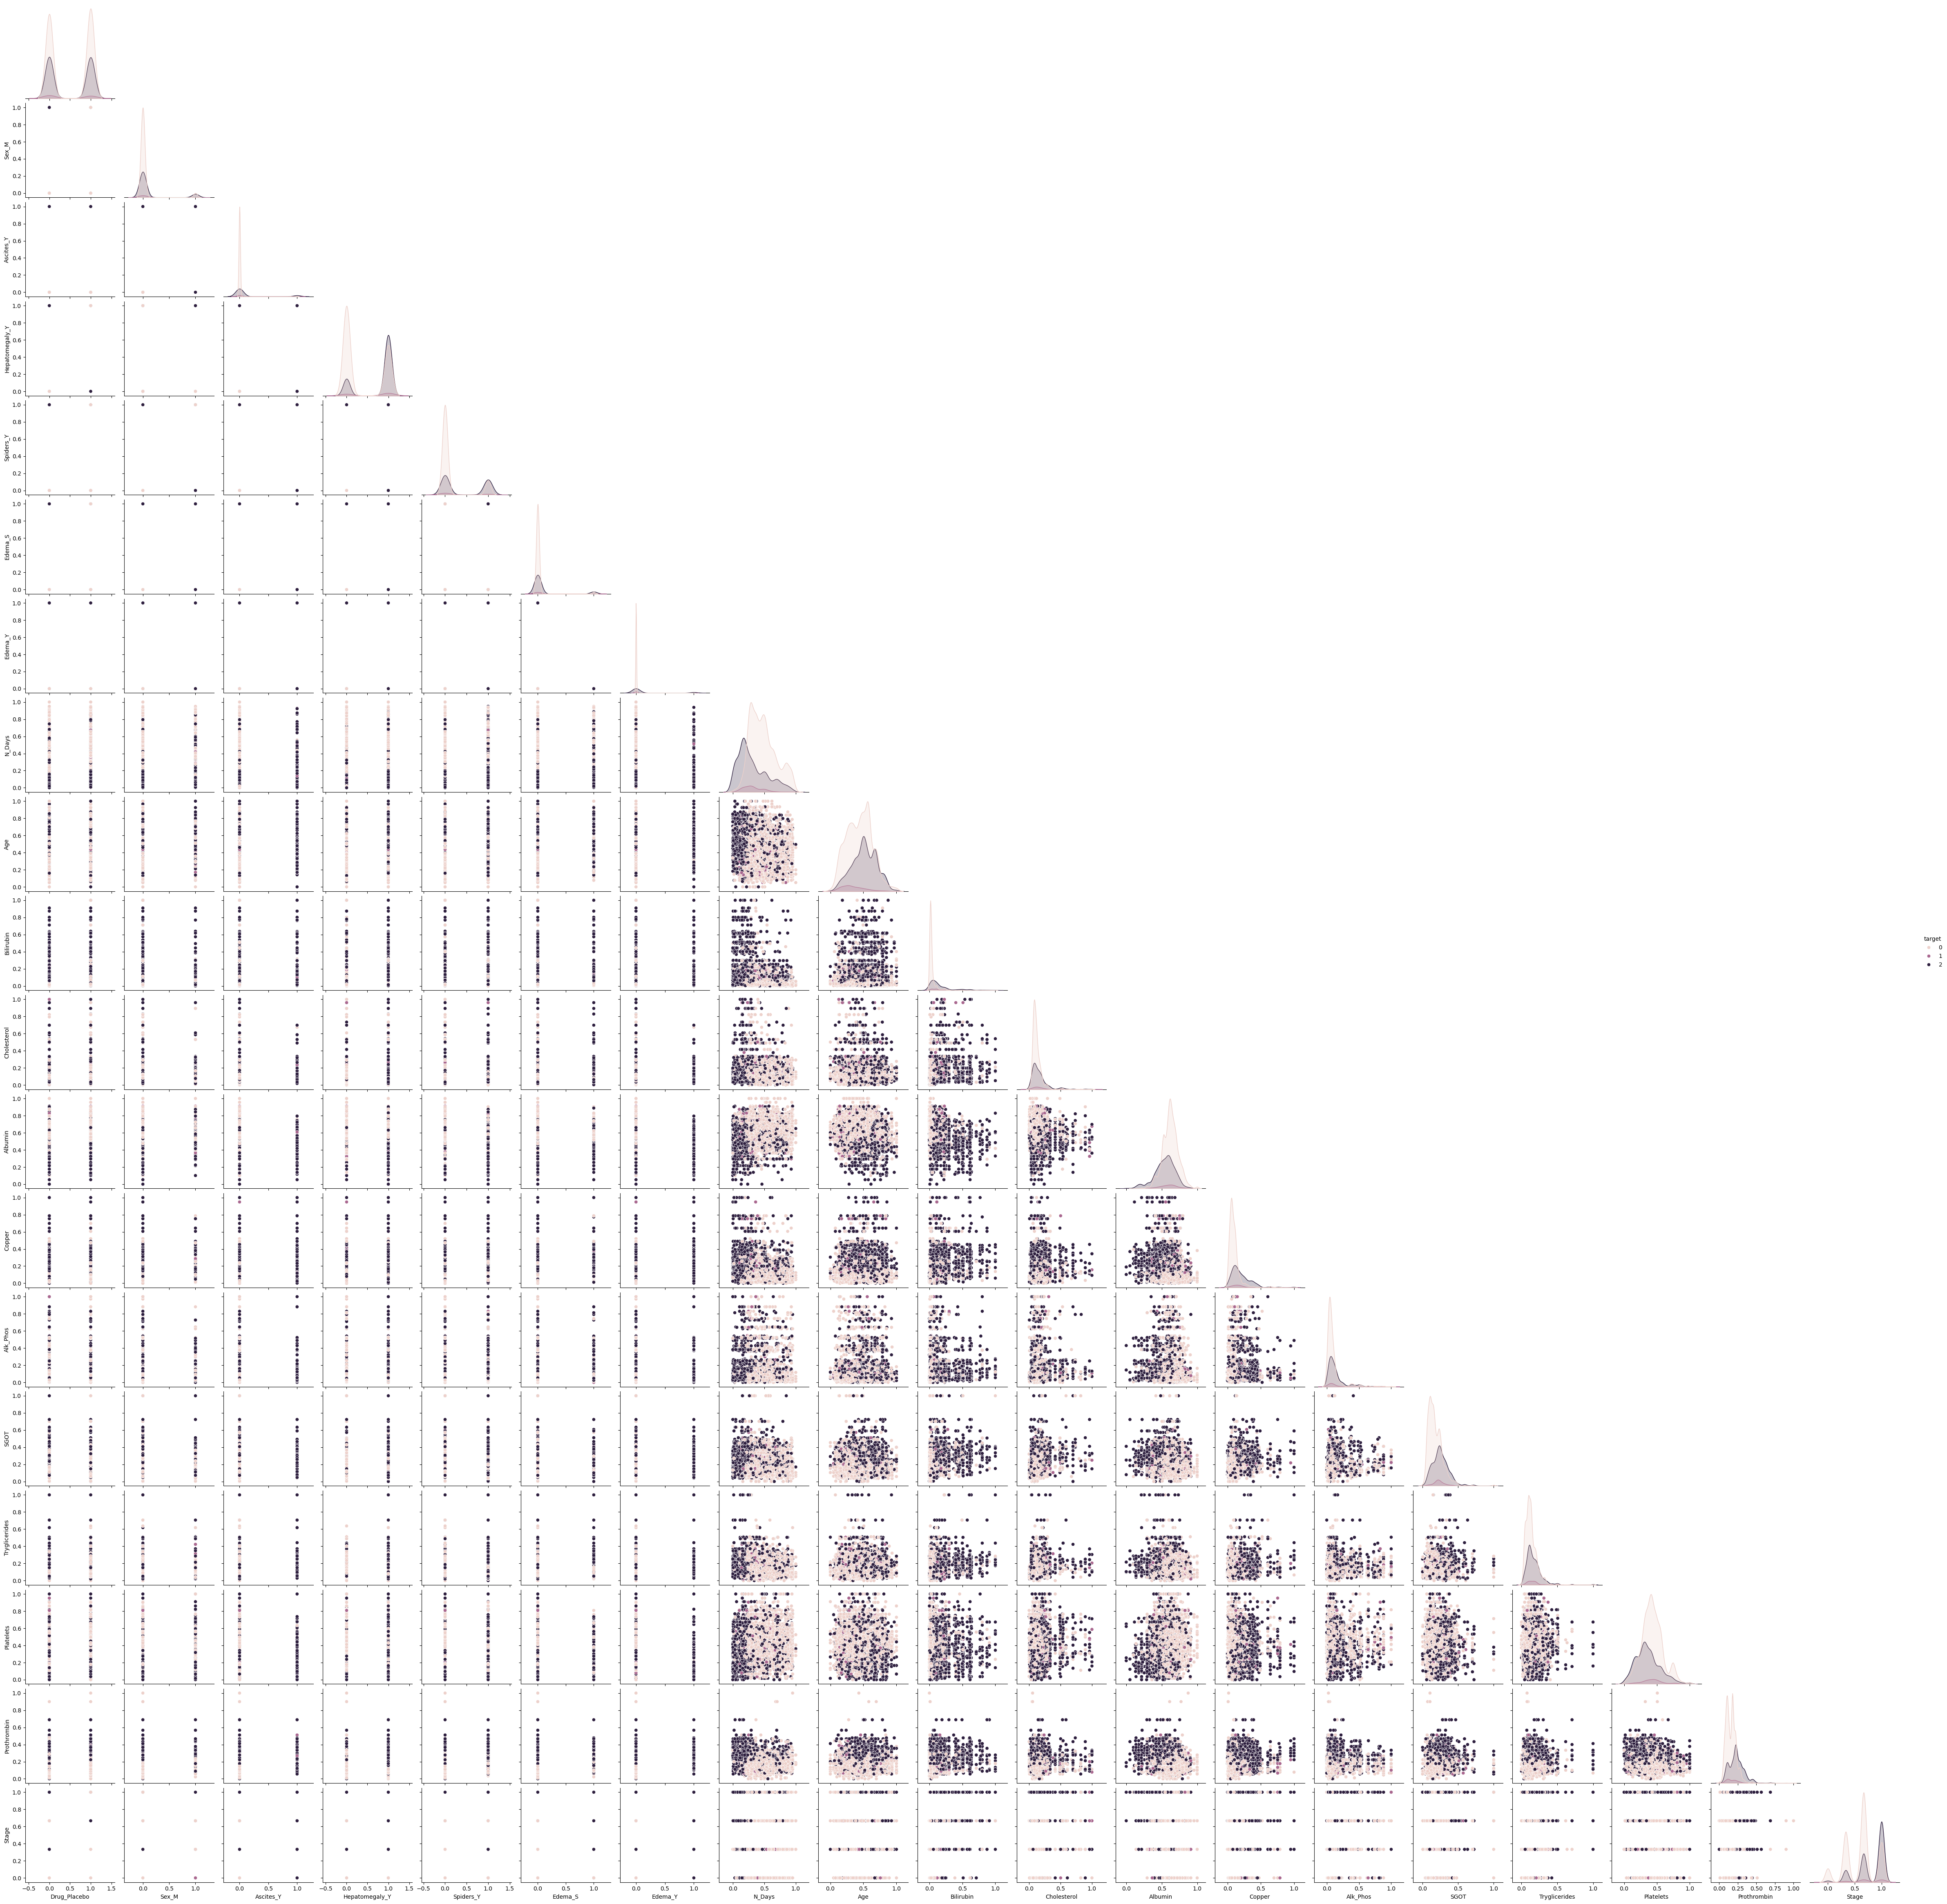


--- Correlation Heatmap ---


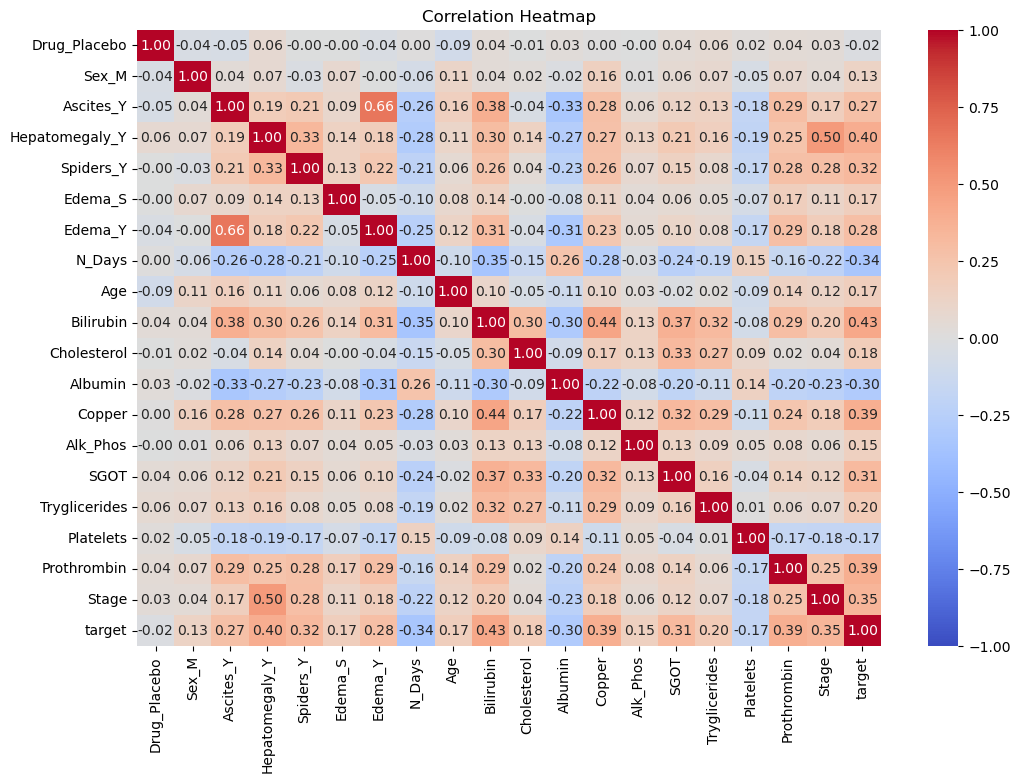

All plots have been saved to the directory: EDA_Plots_20250112_145434


In [26]:
eda_dataframe(train_encoded,'target')

In [27]:
train_encoded.head()

Drug_Placebo  Sex_M  Ascites_Y  Hepatomegaly_Y  Spiders_Y  Edema_S  \
0           0.0    1.0        0.0             0.0        0.0      0.0   
1           1.0    0.0        0.0             0.0        0.0      0.0   
2           1.0    0.0        0.0             1.0        1.0      0.0   
3           1.0    0.0        0.0             0.0        0.0      0.0   
4           1.0    0.0        0.0             1.0        0.0      0.0   

   Edema_Y    N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
0      0.0  0.201515  0.626391   0.072202     0.118429  0.518657  0.287671   
1      0.0  0.532814  0.505931   0.021661     0.147432  0.589552  0.101027   
2      1.0  0.712453  0.216723   0.108303     0.108157  0.593284  0.217466   
3      0.0  0.533235  0.465148   0.010830     0.082175  0.574627  0.092466   
4      0.0  0.157131  0.370565   0.028881     0.136556  0.630597  0.101027   

   Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin     Stage  target  
0  0.096660  0.356115       0.053097   0.662675     0.077778  0.666667       2  
1  0.084798  0.251799       0.097345   0.596806     0.222222  0.666667       0  
2  0.054518  0.215827       0.030088   0.273453     0.300000  1.000000       2  
3  0.100491  0.104317       0.111504   0.413174     0.188889  0.666667       0  
4  0.065717  0.230216       0.111504   0.471058     0.177778  1.000000       0

# 3. Machine Learning Algorithms

In [14]:
#train test split

train_x,test_x,train_y,test_y=train_test_split(train_encoded.drop('target',axis=1),train_encoded['target'])

In [29]:
train_y.unique()

array([0, 2, 1])

## 3.1 SVM, Logistic Regression, and Random Forest Algorithms

In [30]:
svm=SVC(probability=True)
param_grid = {
    'C': [ 1, 10, 100],
    'gamma': [ 0.01, 0.1, 1],
    'kernel': [ 'rbf', 'poly', 'sigmoid'],
    'coef0': [0,1,10],
}

# grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
# grid_search.fit(train_x, train_y)

# #printing best parameters

# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation accuracy:", grid_search.best_score_)

In [ ]:
# # fiting to test/validation set

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(test_x)
# #y_pred_proba = best_model.predict_proba(test_x) ---fix this

# print("\nClassification Report:\n", classification_report(test_y, y_pred))
# print("Test Set Accuracy:", accuracy_score(test_y, y_pred))
# print("Train Set Accuracy:", accuracy_score(train_y, best_model.predict(train_x)))
# #print("Train set log_loss:",log_loss(train_y,best_model.predict_proba(train_x))) ---fix this
# #print("Test set log_loss:",log_loss(test_y,y_pred_proba)) ---fix this


In [31]:
#function for grid search for all other algorithms

def perform_grid_search(model, param_grid, X_train, y_train, model_name):
    """
     perform grid search for all models
     parameters:
     model (element): declared name of the model
     param_grid(dictionary): dict of parameters for the model
     X_train(dataframe): X metrix
     y_train(dataframe): Y metrix
     model_name (str): name of the algorithm

     Returns: best fit for estimators
    """
    print(f"\nPerforming Grid Search for {model_name}...\n")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model_name}:", grid_search.best_params_)
    print(f"Best cross-validation accuracy for {model_name}:", grid_search.best_score_)
    return grid_search.best_estimator_


In [32]:
#logistic regression
lr=LogisticRegression()
log_reg_params = {
    'C': [0.1, 1, 10 ],
    'penalty': ['l1', 'l2'],
    'solver': ['saga','lbfgs']
}

best_log_reg = perform_grid_search(lr, log_reg_params, train_x, train_y, "Logistic Regression")



Performing Grid Search for Logistic Regression...

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation accuracy for Logistic Regression: 0.791502123935364


C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_

In [33]:
#random forest
rf=RandomForestClassifier(random_state=42)
rf_params = {
    'criterion':['gini','log_loss'],
    'n_estimators': [5,10, 15],
    'max_depth': [ 5, 6,7],
    'min_samples_split': [2, 5],
    'max_features':['sqrt', 'log2']
    
}

best_rf = perform_grid_search(rf, rf_params, train_x, train_y, "Random Forest")



Performing Grid Search for Random Forest...

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 15}
Best cross-validation accuracy for Random Forest: 0.8151178659608229


In [187]:
#SVM
svm=SVC(probability=True)
param_grid = {
    'C': [ 1, 10, 100],
    'gamma': [ 0.01, 0.1, 1],
    'kernel': [ 'rbf', 'sigmoid'],
    'coef0': [0,1,10],
}

best_svm = perform_grid_search(svm, param_grid, train_x, train_y, "SVM")



Performing Grid Search for SVM...

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for SVM: {'C': 100, 'coef0': 0, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy for SVM: 0.7972368205719327


In [18]:
#evaluating algorithms

def evaluate_model(model, X_train,X_test,y_train, y_test, model_name):
    """
    Evaluating the models by looking at confusion matrics, accuracy_score, and logloss
    Parameters:
    model: the fitted model
    X_test,y_test (dataframes): test/validation datasets
    X_train,y_train (dataframes): train datasets
    model_name (str): algorithm name
    
    """
    y_pred = model.predict(X_test)
    print(f"\n--- {model_name} Performance on Test Set ---\n")
    print(classification_report(y_test, y_pred,zero_division=1)) #added zero_division because ANN gave 0 as pred prob for few classes
    print(f"Train Set Accuracy for {model_name}: {accuracy_score(y_train, model.predict(X_train))}\n")
    print(f"Test Set Accuracy for {model_name}: {accuracy_score(y_test, y_pred)}\n")
    print(f"Train Set Log loss for {model_name}: {log_loss(y_train,model.predict_proba(X_train))}\n")
    print(f"Test Set Log loss for {model_name}: {log_loss(y_test,model.predict_proba(X_test))}\n")


    

In [36]:
evaluate_model(best_log_reg,train_x,test_x,train_y,test_y,"Logistic Regression")


--- Logistic Regression Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1251
           1       0.00      0.00      0.00        77
           2       0.78      0.67      0.72       649

    accuracy                           0.80      1977
   macro avg       0.53      0.53      0.53      1977
weighted avg       0.77      0.80      0.78      1977

Train Set Accuracy for Logistic Regression: 0.7923414304993253

Test Set Accuracy for Logistic Regression: 0.8042488619119879

Train Set Log loss for Logistic Regression: 0.5240532294407774

Test Set Log loss for Logistic Regression: 0.5132572497289546



C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
evaluate_model(best_rf,train_x,test_x,train_y,test_y,"Random Forest")


--- Random Forest Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1251
           1       0.50      0.01      0.03        77
           2       0.79      0.72      0.75       649

    accuracy                           0.82      1977
   macro avg       0.71      0.55      0.55      1977
weighted avg       0.81      0.82      0.80      1977

Train Set Accuracy for Random Forest: 0.8488529014844804

Test Set Accuracy for Random Forest: 0.821446636317653

Train Set Log loss for Random Forest: 0.4171455390442945

Test Set Log loss for Random Forest: 0.4798680734589189



In [188]:
evaluate_model(best_svm,train_x,test_x,train_y,test_y,"SVM")


--- SVM Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1251
           1       0.50      0.01      0.03        77
           2       0.80      0.69      0.74       649

    accuracy                           0.81      1977
   macro avg       0.71      0.54      0.54      1977
weighted avg       0.80      0.81      0.79      1977

Train Set Accuracy for SVM: 0.8201754385964912

Test Set Accuracy for SVM: 0.813859382903389

Train Set Log loss for SVM: 0.48000524452005233

Test Set Log loss for SVM: 0.5211967787788935



## 3.2 XGBoost with Random Search

Had to use RandomizedSearchCV, as GridSarchCV does not support early stopping

In [193]:
#XGB

XGB=xgb.XGBClassifier(random_state=42,early_stopping_rounds=10, use_label_encoder=False,  eval_metric='mlogloss')
xgb_params={
    'learning_rate':[0.01,0.1,0.2,0.5],
    'max_depth':np.arange(3,15),
    'gamma':np.arange(0,0.1),
    'alpha':np.arange(0,0.1)
}

#shifted to RandomSearchCV for early stopping

RandomSearchCV=RandomizedSearchCV(estimator=XGB,param_distributions=xgb_params,cv=5,scoring='accuracy',verbose=1,n_jobs=-1,n_iter=50)

#early stopping

RandomSearchCV.fit(train_x,train_y,eval_set=[(test_x,test_y)],verbose=False) #had to degrade sklearn to 1.5.2 for this to work
best_xgb = RandomSearchCV.best_estimator_


C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\xgboost\core.py:158: UserWarning: [22:31:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [39]:
best_params = RandomSearchCV.best_params_
print(f"Best Parameters: {best_params}")
evaluate_model(best_xgb,train_x,test_x,train_y,test_y,"XGBoost")

Best Parameters: {'max_depth': 3, 'learning_rate': 0.5, 'gamma': 0.0, 'alpha': 0.0}

--- XGBoost Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1251
           1       0.67      0.10      0.18        77
           2       0.80      0.74      0.77       649

    accuracy                           0.83      1977
   macro avg       0.77      0.59      0.61      1977
weighted avg       0.82      0.83      0.82      1977

Train Set Accuracy for XGBoost: 0.8586369770580297

Test Set Accuracy for XGBoost: 0.8305513404147699

Train Set Log loss for XGBoost: 0.35944992709117957

Test Set Log loss for XGBoost: 0.44335966889560924



references for xgb and early stopping

1. https://macalusojeff.github.io/post/HyperparameterTuningXGB/
2. https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/#:~:text=XGBoost%20supports%20early%20stopping%20after,specified%20in%20the%20early_stopping_rounds%20parameter.
3. https://xgboost.readthedocs.io/en/stable/parameter.html

## 3.3 Simple Neural Network

In [47]:
train_x.shape

(5928, 19)

In [66]:
#need to convert target column into 3 cols for ANN
enc=OneHotEncoder(drop=None,sparse_output=False)
enc.fit(pd.DataFrame(train_y))
train_y_enc=pd.DataFrame(enc.transform(pd.DataFrame(train_y)))
test_y_enc=pd.DataFrame(enc.transform(pd.DataFrame(test_y)))

In [67]:
train_y_enc.head()

0    1    2
0  1.0  0.0  0.0
1  0.0  0.0  1.0
2  0.0  0.0  1.0
3  0.0  0.0  1.0
4  0.0  0.0  1.0

Epoch 1/50
186/186 [==============================] - 2s 7ms/step - loss: 0.7072 - accuracy: 0.6974 - val_loss: 0.5438 - val_accuracy: 0.7956
Epoch 2/50
186/186 [==============================] - 1s 5ms/step - loss: 0.5761 - accuracy: 0.7836 - val_loss: 0.5236 - val_accuracy: 0.7992
Epoch 3/50
186/186 [==============================] - 1s 5ms/step - loss: 0.5546 - accuracy: 0.7868 - val_loss: 0.5093 - val_accuracy: 0.8063
Epoch 4/50
186/186 [==============================] - 1s 5ms/step - loss: 0.5456 - accuracy: 0.7940 - val_loss: 0.5099 - val_accuracy: 0.8063
Epoch 5/50
186/186 [==============================] - 1s 5ms/step - loss: 0.5340 - accuracy: 0.7917 - val_loss: 0.5099 - val_accuracy: 0.8098
Epoch 6/50
186/186 [==============================] - 1s 5ms/step - loss: 0.5320 - accuracy: 0.8001 - val_loss: 0.4982 - val_accuracy: 0.8098
Epoch 7/50
186/186 [==============================] - 1s 5ms/step - loss: 0.5246 - accuracy: 0.7982 - val_loss: 0.5084 - val_accuracy: 0.8053
Epoch 

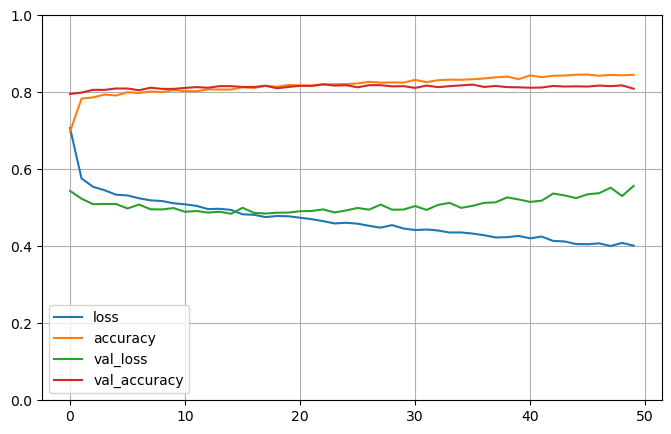

In [92]:
model=keras.models.Sequential(
[
    keras.layers.Dense(128,input_dim=19,activation='relu'),
    #keras.layers.Dropout(0.2), #for overfitting
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.3), #for overfitting
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dropout(0.2), #for overfitting
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(len(np.unique(train_y)), activation='softmax')
]
)

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history=model.fit(train_x,train_y_enc,epochs=50,batch_size=32,verbose=1,validation_data=(test_x, test_y_enc))

test_loss, test_accuracy = model.evaluate(test_x, test_y_enc, verbose=0)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [93]:
y_pred = np.argmax(model.predict(test_x),axis=1)

62/62 [==============================] - 0s 3ms/step


In [94]:
model_name='Simple Neural Net'
print(f"\n--- {model_name} Performance on Test Set ---\n")
print(classification_report(test_y, y_pred))
print(f"Train Set Accuracy for {model_name}: {accuracy_score(train_y, np.argmax(model.predict(train_x),axis=1))}\n")
print(f"Test Set Accuracy for {model_name}: {accuracy_score(test_y, np.argmax(model.predict(test_x),axis=1))}\n")
print(f"Train Set Log loss for {model_name}: {log_loss(train_y_enc,model.predict(train_x))}\n")
print(f"Test Set Log loss for {model_name}: {log_loss(test_y_enc,model.predict(test_x))}\n")


--- Simple Neural Net Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1251
           1       0.25      0.08      0.12        77
           2       0.72      0.81      0.76       649

    accuracy                           0.81      1977
   macro avg       0.61      0.58      0.58      1977
weighted avg       0.80      0.81      0.80      1977

186/186 [==============================] - 0s 2ms/step
Train Set Accuracy for Simple Neural Net: 0.854757085020243

62/62 [==============================] - 0s 2ms/step
Test Set Accuracy for Simple Neural Net: 0.8093070308548306

186/186 [==============================] - 0s 2ms/step
Train Set Log loss for Simple Neural Net: 0.3743232424448563

62/62 [==============================] - 0s 2ms/step
Test Set Log loss for Simple Neural Net: 0.5530015000243819



# 4.Prediction with SMOTE and Stratified-K Fold

In [131]:
#setting up SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)

#K-fold CV for preserving the class %s

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## 4.1 Logistic Regression

In [132]:
#logistic regression

lr_2 = LogisticRegression()
log_reg_params = {'model__C': [0.1, 1, 10 ],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['saga','lbfgs']}

log_reg_pipeline = Pipeline([("smote", smote), ("model", lr_2)])



log_reg_grid = GridSearchCV(
    log_reg_pipeline,
    param_grid=log_reg_params,
    cv=skf,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
)

log_reg_grid.fit(train_x, train_y)
print("Logistic Regression Best Params:", log_reg_grid.best_params_)
print("Logistic Regression Best Score:", log_reg_grid.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\imblearn\pipeline.py", line 333, in fit
    self._final_estimator.fit(Xt, 

Logistic Regression Best Params: {'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'saga'}
Logistic Regression Best Score: 0.6734155869105811


C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [133]:
evaluate_model(log_reg_grid,train_x,test_x,train_y,test_y,"Logistic Regression")


--- Logistic Regression Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1251
           1       0.11      0.53      0.18        77
           2       0.75      0.66      0.70       649

    accuracy                           0.69      1977
   macro avg       0.58      0.64      0.56      1977
weighted avg       0.81      0.69      0.74      1977

Train Set Accuracy for Logistic Regression: 0.6778002699055331

Test Set Accuracy for Logistic Regression: 0.6944865958523014

Train Set Log loss for Logistic Regression: 0.789713227033345

Test Set Log loss for Logistic Regression: 0.7508605043597906



In [134]:
#without SMOTE
evaluate_model(best_log_reg,train_x,test_x,train_y,test_y,"Logistic Regression")


--- Logistic Regression Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1251
           1       0.00      0.00      0.00        77
           2       0.78      0.67      0.72       649

    accuracy                           0.80      1977
   macro avg       0.53      0.53      0.53      1977
weighted avg       0.77      0.80      0.78      1977

Train Set Accuracy for Logistic Regression: 0.7923414304993253

Test Set Accuracy for Logistic Regression: 0.8042488619119879

Train Set Log loss for Logistic Regression: 0.5240532294407774

Test Set Log loss for Logistic Regression: 0.5132572497289546



C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 4.2 Random Forest

In [190]:
rf=RandomForestClassifier(random_state=42)

rf=RandomForestClassifier(random_state=42)
rf_params = {
    'model__criterion':['gini','log_loss'],
    'model__n_estimators': [5,10, 15],
    'model__max_depth': [ 5, 6,7],
    'model__min_samples_split': [2, 5],
    'model__max_features':['sqrt', 'log2']
    
}

rf_pipeline = Pipeline([("smote", smote), ("model", rf)])



rf_grid = GridSearchCV(
    rf_pipeline,
    param_grid=rf_params,
    cv=skf,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
)

rf_grid.fit(train_x, train_y)
print("Random Forest Best Params:", rf_grid.best_params_)
print("Random Forest Best Score:", rf_grid.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Best Params: {'model__criterion': 'gini', 'model__max_depth': 7, 'model__max_features': 'sqrt', 'model__min_samples_split': 5, 'model__n_estimators': 10}
Random Forest Best Score: 0.8049907144534336


In [191]:
evaluate_model(rf_grid,train_x,test_x,train_y,test_y,"Random Forest")


--- Random Forest Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1251
           1       0.23      0.19      0.21        77
           2       0.79      0.70      0.74       649

    accuracy                           0.81      1977
   macro avg       0.62      0.60      0.61      1977
weighted avg       0.81      0.81      0.81      1977

Train Set Accuracy for Random Forest: 0.8328272604588394

Test Set Accuracy for Random Forest: 0.8118361153262519

Train Set Log loss for Random Forest: 0.4804240261075594

Test Set Log loss for Random Forest: 0.521548975739293



In [137]:
evaluate_model(best_rf,train_x,test_x,train_y,test_y,"Random Forest")


--- Random Forest Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1251
           1       0.50      0.01      0.03        77
           2       0.79      0.72      0.75       649

    accuracy                           0.82      1977
   macro avg       0.71      0.55      0.55      1977
weighted avg       0.81      0.82      0.80      1977

Train Set Accuracy for Random Forest: 0.8488529014844804

Test Set Accuracy for Random Forest: 0.821446636317653

Train Set Log loss for Random Forest: 0.4171455390442945

Test Set Log loss for Random Forest: 0.4798680734589189



## 4.3 XGBoost

In [138]:
XGB=xgb.XGBClassifier(random_state=42,early_stopping_rounds=10, use_label_encoder=False,  eval_metric='mlogloss')
xgb_params={
    'model__learning_rate':[0.01,0.1,0.2,0.5],
    'model__max_depth':np.arange(3,15),
    'model__gamma':np.arange(0,0.1),
    'model__alpha':np.arange(0,0.1)
}

xgb_pipeline = Pipeline([("smote", smote), ("model", xgb)])

xgb_random=RandomizedSearchCV(estimator=XGB,param_distributions=xgb_params,cv=5,scoring='accuracy',verbose=1,n_jobs=-1,n_iter=50)

xgb_random.fit(train_x,train_y,eval_set=[(test_x,test_y)],verbose=False) 

print("XGBoost Best Params:", xgb_random.best_params_)
print("XGBoost Best Score:", xgb_random.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\xgboost\core.py:158: UserWarning: [16:48:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "model__alpha", "model__gamma", "model__learning_rate", "model__max_depth", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Best Params: {'model__max_depth': 3, 'model__learning_rate': 0.01, 'model__gamma': 0.0, 'model__alpha': 0.0}
XGBoost Best Score: 0.8191667911854903


In [139]:
evaluate_model(xgb_random,train_x,test_x,train_y,test_y,"XGBoost")


--- XGBoost Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1251
           1       0.68      0.17      0.27        77
           2       0.78      0.75      0.77       649

    accuracy                           0.83      1977
   macro avg       0.77      0.61      0.64      1977
weighted avg       0.82      0.83      0.82      1977

Train Set Accuracy for XGBoost: 0.9055330634278003

Test Set Accuracy for XGBoost: 0.8295397066262014

Train Set Log loss for XGBoost: 0.2713474737090789

Test Set Log loss for XGBoost: 0.45024703069739164



## 4.4 SVM

In [192]:
#SVM
svm=SVC(probability=True)
svm_params = {
    'model__C': [ 1, 10, 100],
    'model__gamma': [ 0.01, 0.1, 1],
    'model__kernel': [ 'rbf', 'sigmoid'],
    'model__coef0': [0,1,10],
}

svm_pipeline = Pipeline([("smote", smote), ("model", svm)])



svm_grid = GridSearchCV(
    svm_pipeline,
    param_grid=svm_params,
    cv=skf,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
)

svm_grid.fit(train_x, train_y)
print("SVM Best Params:", svm_grid.best_params_)
print("SVM Best Score:", svm_grid.best_score_)

evaluate_model(svm_grid,train_x,test_x,train_y,test_y,"SVM")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
SVM Best Params: {'model__C': 100, 'model__coef0': 0, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
SVM Best Score: 0.7871119459801766

--- SVM Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1251
           1       0.16      0.18      0.17        77
           2       0.81      0.65      0.72       649

    accuracy                           0.79      1977
   macro avg       0.60      0.58      0.59      1977
weighted avg       0.80      0.79      0.79      1977

Train Set Accuracy for SVM: 0.8162955465587044

Test Set Accuracy for SVM: 0.7946383409205867

Train Set Log loss for SVM: 0.49348584586890304

Test Set Log loss for SVM: 0.5485112113715193



In [140]:
from collections import Counter
X_resampled, y_resampled = smote.fit_resample(train_x, train_y)
print("Class Distribution Before SMOTE:", Counter(train_y))
print("Class Distribution After SMOTE:", Counter(y_resampled))

Class Distribution Before SMOTE: Counter({0: 3714, 2: 2016, 1: 198})
Class Distribution After SMOTE: Counter({0: 3714, 2: 3714, 1: 3714})


# 5. SMOTE with different HyperParameters

In [15]:
#custom SMOTE, with only 1 class balance

custom_strategy={0:3724,2:2016,1:1000}
smote = SMOTE(sampling_strategy=custom_strategy, random_state=42)


In [156]:
#Random Forest
rf=RandomForestClassifier(random_state=42)
rf_param = {
    "model__n_estimators": [50, 100, 150],
    "model__max_depth": [5, 10],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
}

rf_pipeline = Pipeline([("smote", smote), ("model", rf)])

rf_grid = GridSearchCV(
    rf_pipeline,
    param_grid=rf_param,
    cv=skf,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
)

rf_grid.fit(train_x, train_y)
print("Random Forest Best Params:", rf_grid.best_params_)
print("Random Forest Best Score:", rf_grid.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Random Forest Best Params: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 50}
Random Forest Best Score: 0.8142670110501561


In [157]:
evaluate_model(rf_grid,train_x,test_x,train_y,test_y,"Random Forest")


--- Random Forest Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1251
           1       0.31      0.22      0.26        77
           2       0.80      0.71      0.75       649

    accuracy                           0.82      1977
   macro avg       0.65      0.61      0.63      1977
weighted avg       0.81      0.82      0.81      1977

Train Set Accuracy for Random Forest: 0.8967611336032388

Test Set Accuracy for Random Forest: 0.8174001011633789

Train Set Log loss for Random Forest: 0.35724071039155825

Test Set Log loss for Random Forest: 0.4887843967964579



In [148]:
evaluate_model(best_rf,train_x,test_x,train_y,test_y,"Random Forest")


--- Random Forest Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1251
           1       0.50      0.01      0.03        77
           2       0.79      0.72      0.75       649

    accuracy                           0.82      1977
   macro avg       0.71      0.55      0.55      1977
weighted avg       0.81      0.82      0.80      1977

Train Set Accuracy for Random Forest: 0.8488529014844804

Test Set Accuracy for Random Forest: 0.821446636317653

Train Set Log loss for Random Forest: 0.4171455390442945

Test Set Log loss for Random Forest: 0.4798680734589189



In [16]:
#xgb
XGB=xgb.XGBClassifier(random_state=42,early_stopping_rounds=10, use_label_encoder=False,  eval_metric='mlogloss')
xgb_params={
    'model__learning_rate':[0.01,0.1,0.2,0.5],
    'model__max_depth':np.arange(3,15),
    'model__gamma':np.arange(0,0.1),
    'model__alpha':np.arange(0,0.1),
    "model__n_estimators": [100, 200, 300],
}

xgb_pipeline = Pipeline([("smote", smote), ("model", xgb)])

xgb_random=RandomizedSearchCV(estimator=XGB,param_distributions=xgb_params,cv=5,scoring='accuracy',verbose=1,n_jobs=-1,n_iter=50)

xgb_random.fit(train_x,train_y,eval_set=[(test_x,test_y)],verbose=False) 

print("XGBoost Best Params:", xgb_random.best_params_)
print("XGBoost Best Score:", xgb_random.best_score_)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\xgboost\core.py:158: UserWarning: [20:26:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "model__alpha", "model__gamma", "model__learning_rate", "model__max_depth", "model__n_estimators", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Best Params: {'model__n_estimators': 100, 'model__max_depth': 6, 'model__learning_rate': 0.1, 'model__gamma': 0.0, 'model__alpha': 0.0}
XGBoost Best Score: 0.8184912587785769


In [19]:
evaluate_model(xgb_random,train_x,test_x,train_y,test_y,"XGB")


--- XGB Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1265
           1       0.67      0.17      0.27        58
           2       0.78      0.76      0.77       654

    accuracy                           0.83      1977
   macro avg       0.77      0.61      0.64      1977
weighted avg       0.83      0.83      0.83      1977

Train Set Accuracy for XGB: 0.9239203778677463

Test Set Accuracy for XGB: 0.8335862417804755

Train Set Log loss for XGB: 0.2333725833422643

Test Set Log loss for XGB: 0.4396019577146735



In [151]:
evaluate_model(best_xgb,train_x,test_x,train_y,test_y,"XGBoost")


--- XGBoost Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1251
           1       0.67      0.10      0.18        77
           2       0.80      0.74      0.77       649

    accuracy                           0.83      1977
   macro avg       0.77      0.59      0.61      1977
weighted avg       0.82      0.83      0.82      1977

Train Set Accuracy for XGBoost: 0.8586369770580297

Test Set Accuracy for XGBoost: 0.8305513404147699

Train Set Log loss for XGBoost: 0.35944992709117957

Test Set Log loss for XGBoost: 0.44335966889560924



# 6. Trying to improve ANN

Will be trying the following things:

1. Weight Decay 2. Dropout inc 3. Class weight for loss function (higher weight for smaller class)


Reference:
https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
and Class Notes
    

Class Weights: {0: 0.5320409262250942, 1: 9.97979797979798, 2: 0.9801587301587301}
Epoch 1/50
186/186 [==============================] - 1s 3ms/step - loss: 1.4086 - accuracy: 0.3617 - val_loss: 1.1546 - val_accuracy: 0.5706
Epoch 2/50
186/186 [==============================] - 0s 2ms/step - loss: 1.2105 - accuracy: 0.4782 - val_loss: 1.0600 - val_accuracy: 0.6277
Epoch 3/50
186/186 [==============================] - 0s 2ms/step - loss: 1.1570 - accuracy: 0.5218 - val_loss: 0.9773 - val_accuracy: 0.6424
Epoch 4/50
186/186 [==============================] - 0s 2ms/step - loss: 1.1532 - accuracy: 0.5450 - val_loss: 0.9621 - val_accuracy: 0.6343
Epoch 5/50
186/186 [==============================] - 0s 2ms/step - loss: 1.0878 - accuracy: 0.5616 - val_loss: 0.9313 - val_accuracy: 0.6449
Epoch 6/50
186/186 [==============================] - 0s 2ms/step - loss: 1.1072 - accuracy: 0.5599 - val_loss: 0.9192 - val_accuracy: 0.6505
Epoch 7/50
186/186 [==============================] - 0s 2ms/step

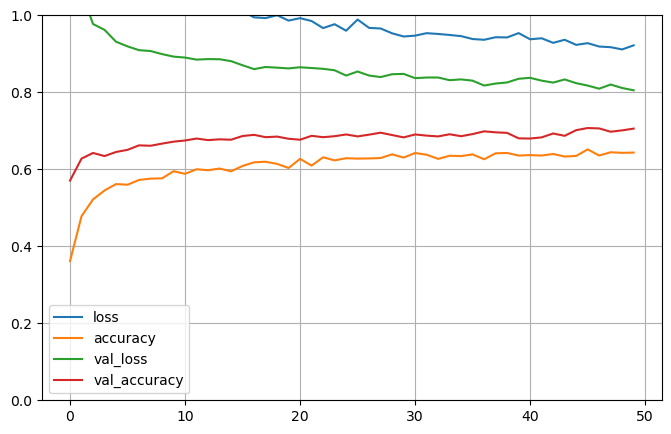

In [171]:
#class weights
class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(train_y), 
    y=train_y
)
class_weights = {i: weight for i, weight in enumerate(class_weights)}
print("Class Weights:", class_weights)

# model
model=keras.models.Sequential(
[
    keras.layers.Dense(128,input_dim=19,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3), #for overfitting
    keras.layers.Dense(64,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3), #for overfitting
    keras.layers.Dense(32,activation='relu'),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.3), #for overfitting
    #keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(len(np.unique(train_y)), activation='softmax')
]
)

# learning rate 
learning_rate = 0.0001
optimiser = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history=model.fit(train_x,train_y_enc,epochs=50,batch_size=32,verbose=1,validation_data=(test_x, test_y_enc),class_weight=class_weights)

test_loss, test_accuracy = model.evaluate(test_x, test_y_enc, verbose=0)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # setting limits for y-axis
plt.show()

In [172]:
y_pred = np.argmax(model.predict(test_x),axis=1)

model_name='Simple Neural Net'
print(f"\n--- {model_name} Performance on Test Set ---\n")
print(classification_report(test_y, y_pred))
print(f"Train Set Accuracy for {model_name}: {accuracy_score(train_y, np.argmax(model.predict(train_x),axis=1))}\n")
print(f"Test Set Accuracy for {model_name}: {accuracy_score(test_y, np.argmax(model.predict(test_x),axis=1))}\n")
print(f"Train Set Log loss for {model_name}: {log_loss(train_y_enc,model.predict(train_x))}\n")
print(f"Test Set Log loss for {model_name}: {log_loss(test_y_enc,model.predict(test_x))}\n")

62/62 [==============================] - 0s 1ms/step

--- Simple Neural Net Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1251
           1       0.12      0.56      0.19        77
           2       0.76      0.63      0.69       649

    accuracy                           0.71      1977
   macro avg       0.59      0.65      0.57      1977
weighted avg       0.81      0.71      0.75      1977

186/186 [==============================] - 0s 1ms/step
Train Set Accuracy for Simple Neural Net: 0.6953441295546559

62/62 [==============================] - 0s 1ms/step
Test Set Accuracy for Simple Neural Net: 0.7056145675265554

186/186 [==============================] - 0s 970us/step
Train Set Log loss for Simple Neural Net: 0.7283827096519961

62/62 [==============================] - 0s 2ms/step
Test Set Log loss for Simple Neural Net: 0.7091518139152092



Epoch 1/50
186/186 [==============================] - 1s 3ms/step - loss: 1.0539 - accuracy: 0.3149 - val_loss: 0.9652 - val_accuracy: 0.3283
Epoch 2/50
186/186 [==============================] - 0s 2ms/step - loss: 0.8934 - accuracy: 0.4705 - val_loss: 0.7942 - val_accuracy: 0.7532
Epoch 3/50
186/186 [==============================] - 0s 2ms/step - loss: 0.7396 - accuracy: 0.7065 - val_loss: 0.6601 - val_accuracy: 0.7648
Epoch 4/50
186/186 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.7370 - val_loss: 0.5952 - val_accuracy: 0.7785
Epoch 5/50
186/186 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.7517 - val_loss: 0.5697 - val_accuracy: 0.7911
Epoch 6/50
186/186 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.7648 - val_loss: 0.5579 - val_accuracy: 0.7946
Epoch 7/50
186/186 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.7704 - val_loss: 0.5510 - val_accuracy: 0.8002
Epoch 

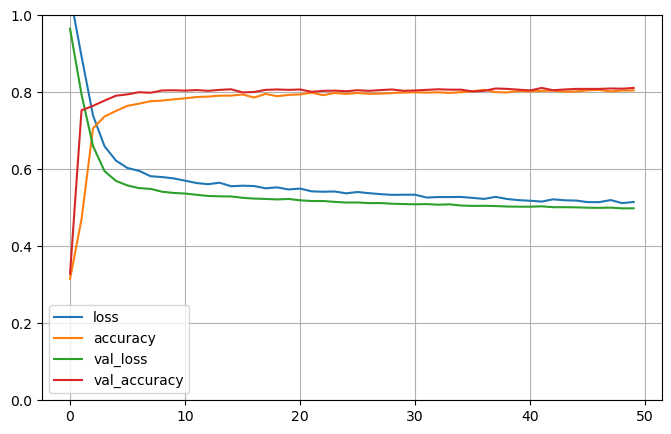

In [181]:
#removed class weight, but kept learning rate

model=keras.models.Sequential(
[
    keras.layers.Dense(128,input_dim=19,activation='relu'),
    #keras.layers.Dropout(0.2), #for overfitting
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.3), #for overfitting
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dropout(0.2), #for overfitting
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(len(np.unique(train_y)), activation='softmax')
]
)

# learning rate 
learning_rate = 0.0001
optimiser = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history=model.fit(train_x,train_y_enc,epochs=50,batch_size=32,verbose=1,validation_data=(test_x, test_y_enc))

test_loss, test_accuracy = model.evaluate(test_x, test_y_enc, verbose=0)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [186]:
y_pred = np.argmax(model.predict(test_x),axis=1)

model_name='Simple Neural Net'
print(f"\n--- {model_name} Performance on Test Set ---\n")
print(classification_report(test_y, y_pred))
print(f"Train Set Accuracy for {model_name}: {accuracy_score(train_y, np.argmax(model.predict(train_x),axis=1))}\n")
print(f"Test Set Accuracy for {model_name}: {accuracy_score(test_y, np.argmax(model.predict(test_x),axis=1))}\n")
print(f"Train Set Log loss for {model_name}: {log_loss(train_y_enc,model.predict(train_x))}\n")
print(f"Test Set Log loss for {model_name}: {log_loss(test_y_enc,model.predict(test_x))}\n")

62/62 [==============================] - 0s 1ms/step

--- Simple Neural Net Performance on Test Set ---

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1251
           1       0.00      0.00      0.00        77
           2       0.74      0.75      0.75       649

    accuracy                           0.81      1977
   macro avg       0.53      0.55      0.54      1977
weighted avg       0.78      0.81      0.79      1977

 96/186 [==============>...............] - ETA: 0s

C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vagish\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


186/186 [==============================] - 0s 1ms/step
Train Set Accuracy for Simple Neural Net: 0.8114035087719298

62/62 [==============================] - 0s 1ms/step
Test Set Accuracy for Simple Neural Net: 0.8113302984319676

186/186 [==============================] - 0s 1ms/step
Train Set Log loss for Simple Neural Net: 0.4968906877747585

62/62 [==============================] - 0s 4ms/step
Test Set Log loss for Simple Neural Net: 0.4985976431921336



# 7. Implementing Model on Test Data

In [196]:
test_encoded.head()

#Using XGB without class imbalance correction

prediction=pd.DataFrame(RandomSearchCV.predict_proba(test_encoded))
prediction.head()


0         1         2
0  0.613919  0.011274  0.374807
1  0.627230  0.115170  0.257600
2  0.053141  0.047747  0.899112
3  0.875119  0.006283  0.118598
4  0.696952  0.105052  0.197996

In [199]:
prediction.columns=['Status_C' ,'Status_CL' ,'Status_D']

In [200]:
test_df.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0  7905    3839  D-penicillamine  19724   F       N            Y       N   
1  7906    2468  D-penicillamine  14975   F       N            N       N   
2  7907      51          Placebo  13149   F       N            Y       N   
3  7908    2330  D-penicillamine  20510   F       N            N       N   
4  7909    1615  D-penicillamine  21904   F       N            Y       N   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     N        1.2        546.0     3.37    65.0    1636.0  151.90   
1     N        1.1        660.0     4.22    94.0    1257.0  151.90   
2     Y        2.0        151.0     2.96    46.0     961.0   69.75   
3     N        0.6        293.0     3.85    40.0     554.0  125.55   
4     N        1.4        277.0     2.97   121.0    1110.0  125.00   

   Tryglicerides  Platelets  Prothrombin  Stage  
0           90.0      430.0         10.6    2.0  
1          155.0      227.0         10.0    2.0  
2          101.0      213.0         13.0    4.0  
3           56.0      270.0         10.6    2.0  
4          126.0      221.0          9.8    1.0

In [202]:
prediction_1=pd.concat([test_df['id'],prediction],axis=1)

In [204]:
prediction_1.head()

id  Status_C  Status_CL  Status_D
0  7905  0.613919   0.011274  0.374807
1  7906  0.627230   0.115170  0.257600
2  7907  0.053141   0.047747  0.899112
3  7908  0.875119   0.006283  0.118598
4  7909  0.696952   0.105052  0.197996

In [205]:
prediction_1.to_csv("prediction_xgb_1.csv")

In [22]:
#Using XGB with custom SMOTE
prediction_t2=pd.DataFrame(xgb_random.predict_proba(test_encoded))
prediction_t2.head()

prediction_t2.columns=['Status_C' ,'Status_CL' ,'Status_D']
prediction_2=pd.concat([test_df['id'],prediction_t2],axis=1)
prediction_2.to_csv("prediction_xgb_2.csv")